In [50]:
pip install shap

     |████████████████████████████████| 564 kB 27.1 MB/s 


In [51]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

import shap

In [53]:
data = pd.read_csv("/content/archive (30).zip")

In [54]:
data

,670,696,1252,1720,1321,2431,4
0,641,674,1156,1652,1410,2433,4
1,642,646,1159,1643,1455,2361,4
2,640,590,1105,1608,1459,2427,4
3,616,627,1192,1637,1466,2447,4
4,780,896,1438,1813,1489,2434,4
...,...,...,...,...,...,...,...
1839,862,826,1564,1768,1540,2037,4
1840,917,821,1571,1779,1543,2008,4
1841,925,832,1582,1776,1545,1989,4
1842,928,840,1587,1787,1538,1986,4


In [55]:
data = pd.read_csv('/content/archive (30).zip', names=['MQ1', 'MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ6', 'CO2'])

In [56]:
data

,MQ1,MQ2,MQ3,MQ4,MQ5,MQ6,CO2
0,670,696,1252,1720,1321,2431,4
1,641,674,1156,1652,1410,2433,4
2,642,646,1159,1643,1455,2361,4
3,640,590,1105,1608,1459,2427,4
4,616,627,1192,1637,1466,2447,4
...,...,...,...,...,...,...,...
1840,862,826,1564,1768,1540,2037,4
1841,917,821,1571,1779,1543,2008,4
1842,925,832,1582,1776,1545,1989,4
1843,928,840,1587,1787,1538,1986,4


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   MQ1     1845 non-null   int64
 1   MQ2     1845 non-null   int64
 2   MQ3     1845 non-null   int64
 3   MQ4     1845 non-null   int64
 4   MQ5     1845 non-null   int64
 5   MQ6     1845 non-null   int64
 6   CO2     1845 non-null   int64
dtypes: int64(7)
memory usage: 101.0 KB


In [58]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Split df into X and y
    y = df['CO2']
    X = df.drop('CO2', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    return X_train, X_test, y_train, y_test

In [59]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [60]:
X_train

,MQ1,MQ2,MQ3,MQ4,MQ5,MQ6
1695,551,650,1285,1643,1150,2160
427,624,682,1105,1661,1644,2518
289,485,553,1044,1563,1180,2523
529,440,520,932,1460,1154,2398
1443,622,688,1185,1689,1401,2283
...,...,...,...,...,...,...
905,591,689,1132,1652,1398,2279
1791,368,471,987,1446,883,2279
1096,370,478,884,1478,980,2234
235,380,410,860,1416,936,2215


In [61]:
y_train

1695    2
427     4
289     2
529     1
1443    4
       ..
905     4
1791    1
1096    1
235     1
1061    2
Name: CO2, Length: 1291, dtype: int64

In [62]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [63]:
acc = model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 94.40%


In [64]:
##features impact

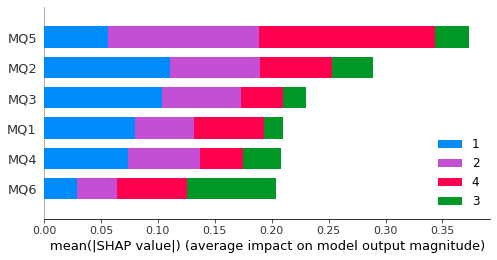

In [65]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_names=model.classes_)